In [10]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit_aer import Aer

In [11]:
secretNumber = input("Enter a binary number (e.g., 101): ")
# for testing purpose use 1000101

In [12]:
print("The secret number is:", secretNumber)

The secret number is: 1000101


In [13]:
circuit = QuantumCircuit(8, 7)
# q7 is ancilla qubit
# q0 to q6 are for the 7 bit secret number

In [14]:
circuit.h(range(7))
circuit.x(7)
circuit.h(7)


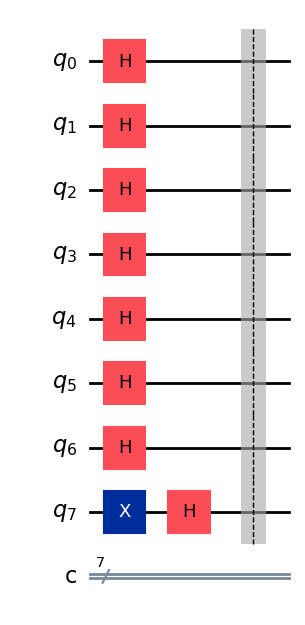

In [15]:
circuit.barrier()
circuit.draw('mpl')

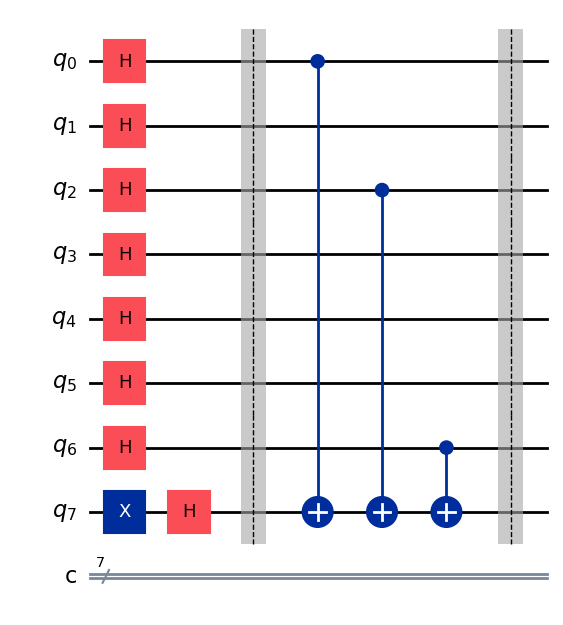

In [16]:
circuit.cx(0, 7)
circuit.cx(2, 7)
circuit.cx(6, 7)
circuit.barrier()

circuit.draw(output='mpl')

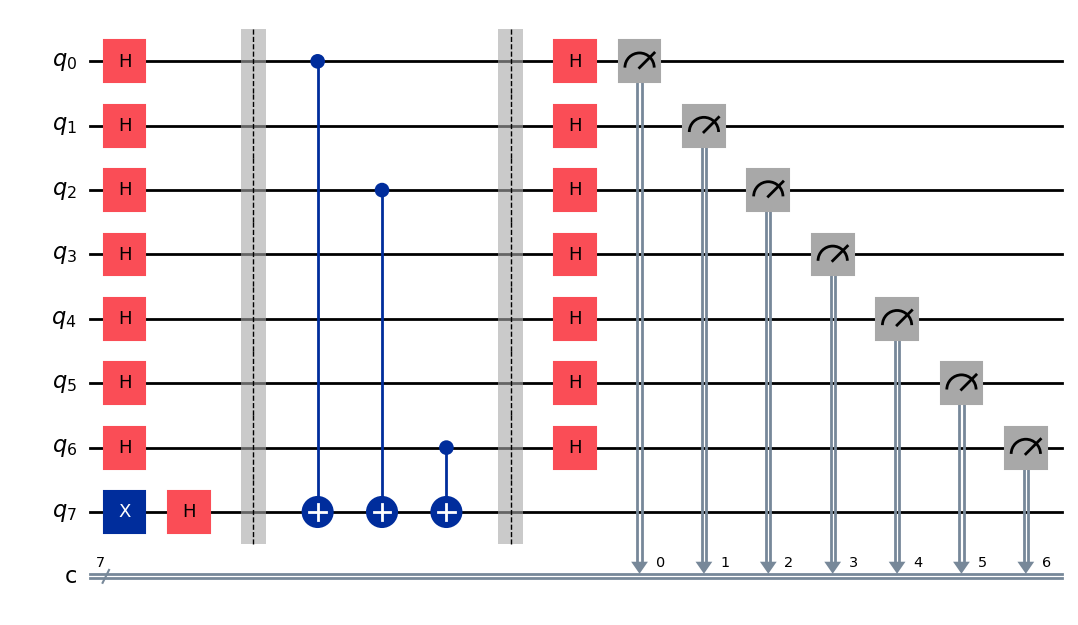

In [17]:
circuit.h(range(7))
circuit.measure(range(7), range(7))
circuit.draw(output='mpl')

{'1000101': 1024}


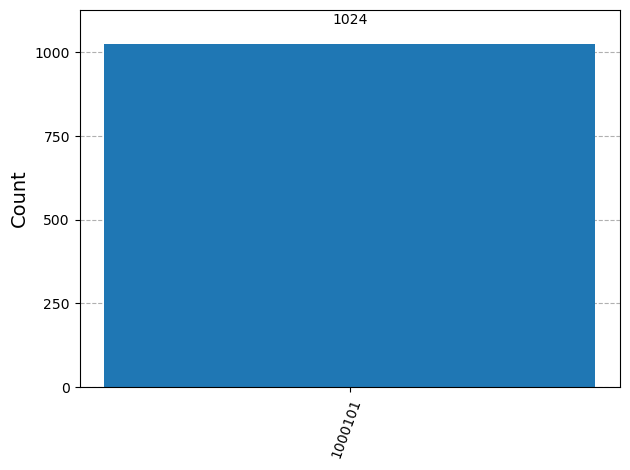

In [19]:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

# Dynamic 

In [20]:
secretNumber = input("Enter a binary number (e.g., 101): ")
secretNumber

'100001100101'

In [21]:
circuit = QuantumCircuit(len(secretNumber)+1, len(secretNumber))

In [22]:
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=13, num_clbits=0, params=[]), qubits=(<Qubit register=(13, "q"), index=0>, <Qubit register=(13, "q"), index=1>, <Qubit register=(13, "q"), index=2>, <Qubit register=(13, "q"), index=3>, <Qubit register=(13, "q"), index=4>, <Qubit register=(13, "q"), index=5>, <Qubit register=(13, "q"), index=6>, <Qubit register=(13, "q"), index=7>, <Qubit register=(13, "q"), index=8>, <Qubit register=(13, "q"), index=9>, <Qubit register=(13, "q"), index=10>, <Qubit register=(13, "q"), index=11>, <Qubit register=(13, "q"), index=12>), clbits=())

In [23]:
for index, one in enumerate(reversed(secretNumber)):
    print(f"index: {index}, one: {one}")
    if one == '1':
        circuit.cx(index, len(secretNumber))

circuit.barrier()
circuit.h(range(len(secretNumber)))
circuit.barrier()
circuit.measure(range(len(secretNumber)), range(len(secretNumber)))

index: 0, one: 1
index: 1, one: 0
index: 2, one: 1
index: 3, one: 0
index: 4, one: 0
index: 5, one: 1
index: 6, one: 1
index: 7, one: 0
index: 8, one: 0
index: 9, one: 0
index: 10, one: 0
index: 11, one: 1


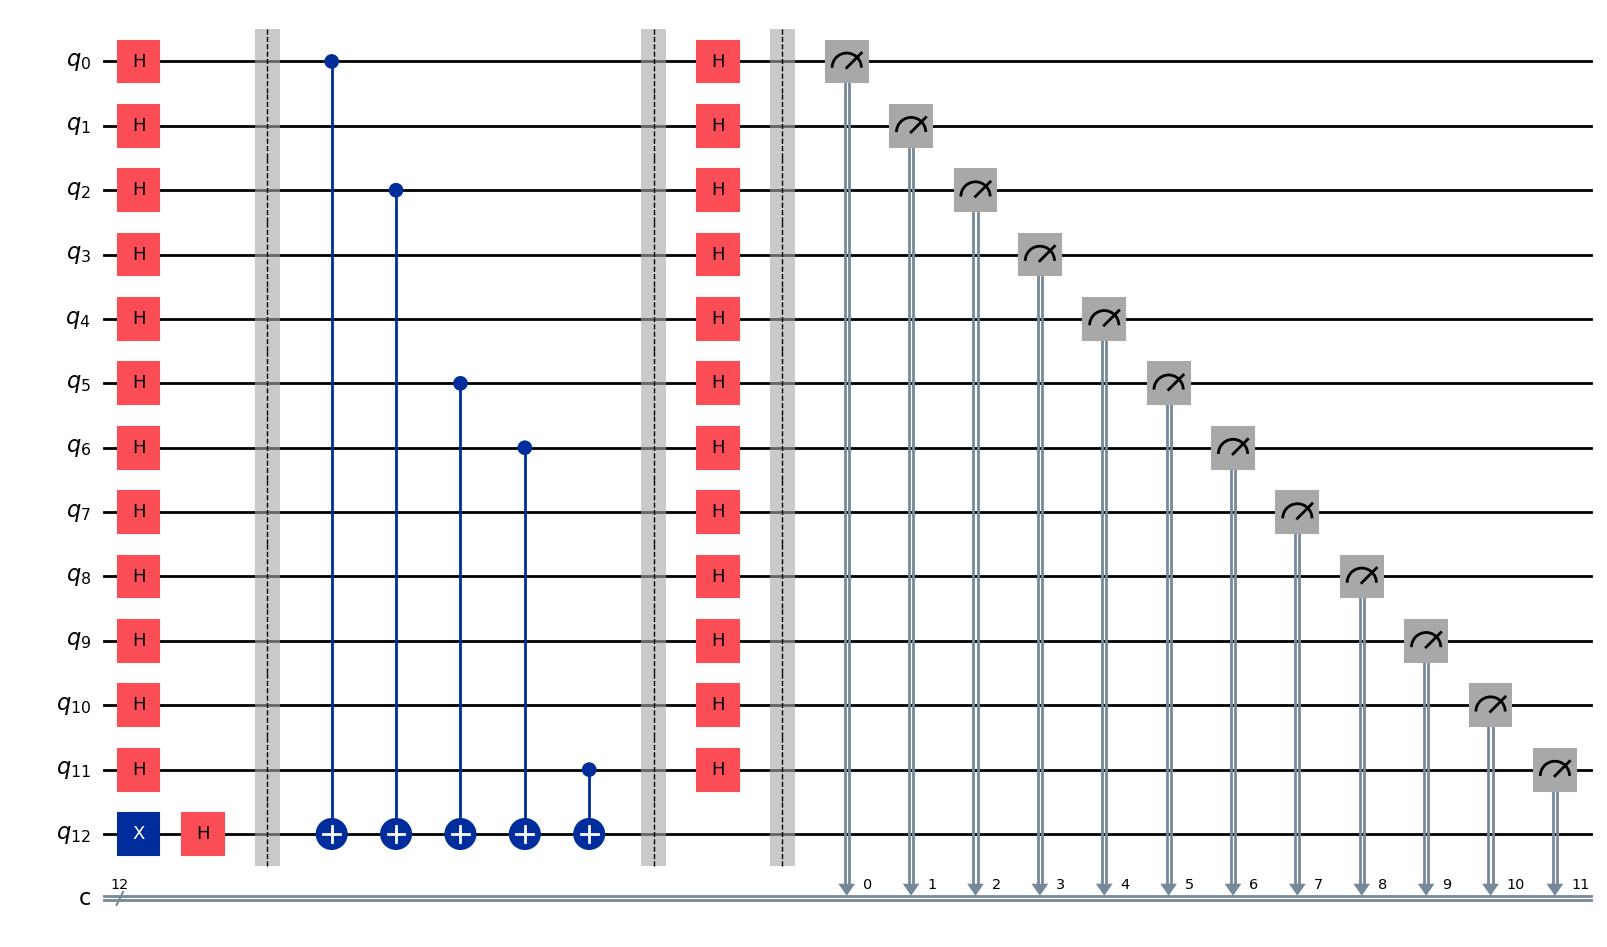

In [24]:
circuit.draw('mpl')

{'100001100101': 1024}


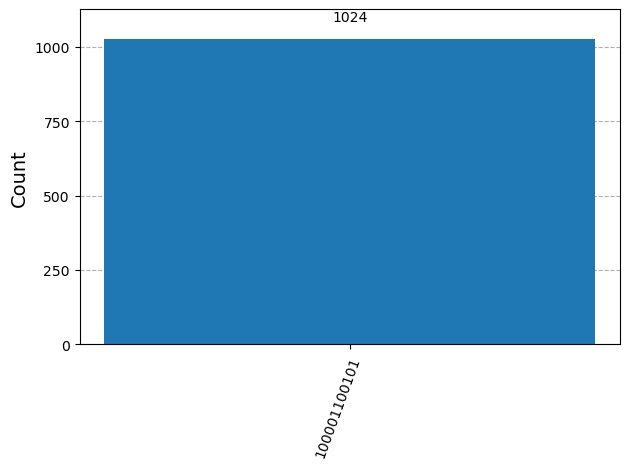

In [26]:
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)